In [85]:
import pandas as pd
import quandl
import math,datetime
import time
import numpy as np
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
import sklearn
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from matplotlib import style

style.use('ggplot')


In [57]:
df=quandl.get('SSE/GGQ1')


In [58]:
import matplotlib
matplotlib.__version__

'2.2.2'

In [59]:
df

,High,Low,Last,Previous Day Price,Volume
Date,,,,,
2014-03-21,872.700,859.000,859.000,864.050,None
2014-03-24,863.950,831.920,834.370,859.000,None
2014-03-25,842.880,834.400,834.400,834.370,None
2014-03-26,845.930,821.000,821.000,834.400,None
2014-03-27,825.000,801.980,812.250,821.000,None
2014-03-28,822.830,810.210,815.500,812.250,None
2014-03-31,822.150,810.000,812.200,815.500,None
2014-04-01,822.440,807.350,819.950,812.200,None
2014-04-02,829.030,821.170,823.350,819.950,None


In [60]:
print(df.tail())

               High      Low     Last  Previous Day Price Volume
Date                                                            
2015-09-28  570.555  554.250  554.250             574.900   None
2015-09-29  558.759  552.066  558.759             554.250   None
2015-09-30  570.418  558.050  569.200             558.759   None
2015-10-01  577.550  568.350  568.350             569.200   None
2015-10-02  580.700  565.990  569.160             568.350   None


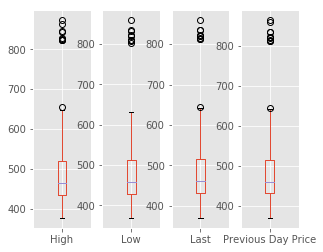

In [61]:
df.plot(kind='box',subplots=True,layout=(1,5),sharex=False,sharey=False)
plt.show()

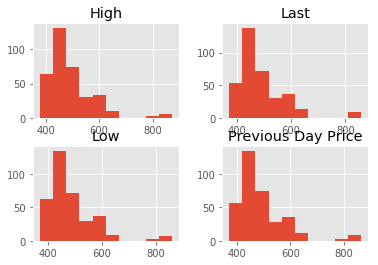

In [62]:
df.hist()
plt.show()

C:\Users\BHAVIKKSVSS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


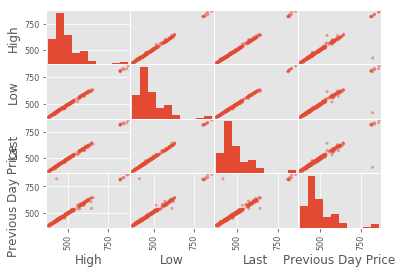

In [63]:
scatter_matrix(df)
plt.show()

In [64]:
forecast_col='Last'
forecast_out=int(math.ceil(0.01*len(df)))
print(forecast_out)

4


In [65]:
label=df[forecast_col].shift(-forecast_out)
df['label']=label
df

,High,Low,Last,Previous Day Price,Volume,label
Date,,,,,,
2014-03-21,872.700,859.000,859.000,864.050,None,812.250
2014-03-24,863.950,831.920,834.370,859.000,None,815.500
2014-03-25,842.880,834.400,834.400,834.370,None,812.200
2014-03-26,845.930,821.000,821.000,834.400,None,819.950
2014-03-27,825.000,801.980,812.250,821.000,None,823.350
2014-03-28,822.830,810.210,815.500,812.250,None,414.250
2014-03-31,822.150,810.000,812.200,815.500,None,399.800
2014-04-01,822.440,807.350,819.950,812.200,None,393.150
2014-04-02,829.030,821.170,823.350,819.950,None,402.240


In [83]:
#df.drop(columns='Volume',inplace=True)
#df.head()
df=df.fillna(df.mean())
y=df[['label']]
y.head()
df.head()
x=df[['High','Low','Last','Previous Day Price']]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.6)
y_train

,label
Date,
2014-03-25,812.200000
2015-06-26,490.945000
2015-05-21,507.700000
2014-09-16,463.230000
2015-07-03,496.650000
2015-08-18,532.662000
2015-09-10,587.670000
2014-12-02,429.350000
2015-08-24,585.750000


In [86]:
clf=svr.SVM()
clf.fit(X_train,y_train)
confidence=clf.score(X_test,y_test)
print(confidence)

NameError: name 'svr' is not defined

In [68]:
df.head()

,High,Low,Last,Previous Day Price,Volume,label
Date,,,,,,
2014-03-21,872.70,859.00,859.00,864.05,NaN,812.25
2014-03-24,863.95,831.92,834.37,859.00,NaN,815.50
2014-03-25,842.88,834.40,834.40,834.37,NaN,812.20
2014-03-26,845.93,821.00,821.00,834.40,NaN,819.95
2014-03-27,825.00,801.98,812.25,821.00,NaN,823.35


In [69]:
arr=clf.predict(df[['High','Low','Last','Previous Day Price']])

In [70]:
diff=np.array(df['label'])-arr

In [71]:
df.tail()

,High,Low,Last,Previous Day Price,Volume,label
Date,,,,,,
2015-09-28,570.555,554.250,554.250,574.900,NaN,569.160000
2015-09-29,558.759,552.066,558.759,554.250,NaN,480.429773
2015-09-30,570.418,558.050,569.200,558.759,NaN,480.429773
2015-10-01,577.550,568.350,568.350,569.200,NaN,480.429773
2015-10-02,580.700,565.990,569.160,568.350,NaN,480.429773


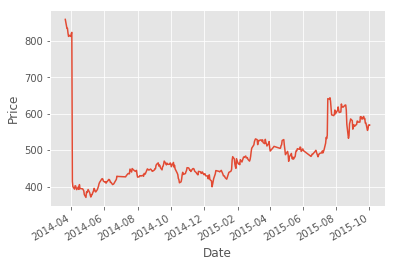

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A0CA7F4940>,
      dtype=object)

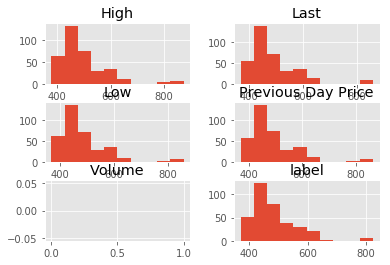

In [54]:
df['Last'].plot()

#plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
df.hist()